# LINEAR REGRESSION ON AUTO MPG DATASET
Predicting car fuel efficiency (MPG) from selected vehicle features using linear regression.

**DATASET SOURCE:** [Auto MPG Dataset] https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/  
**AUTHOR:** Atama Innocent  
**DATE:** 15th August, 2025


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Loading the Auto MPG dataset
file_path=r"C:\Users\DELL\.vscode\auto-mpg[1].csv"
car=pd.read_csv(file_path)
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**DATA PRE-PROCESSING**

In [4]:
print("Shape of dataset: ", car.shape)

Shape of dataset:  (398, 9)


In [5]:
print("\nFirst 5 rows: ")
car.head()


First 5 rows: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
print("\nDataset Info: ") 
car.info()


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The dataset contains two object columns: horsepower and car name.

In [7]:
# Converting "horsepower" to numeric for regression
car["horsepower"]=pd.to_numeric(car["horsepower"],errors="coerce")



In [8]:
# Dropping "car name" column
car=car.drop(columns=["car name"])

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [10]:
print("\nStatistical Summary: ")
car.describe()


Statistical Summary: 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
print("\nMissing values: ")
car.isnull().sum()


Missing values: 


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

6 missing values found in horsepower column.

In [12]:
# Dropping rows with missing values
car=car.dropna()


In [13]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [14]:
print("\nDuplicate rows: ", car.duplicated().sum())


Duplicate rows:  0


There are no duplicate rows in the dataset.

In [15]:
print("\nDataset shape after dropping unwanted column and rows with missing values: ",car.shape)


Dataset shape after dropping unwanted column and rows with missing values:  (392, 8)


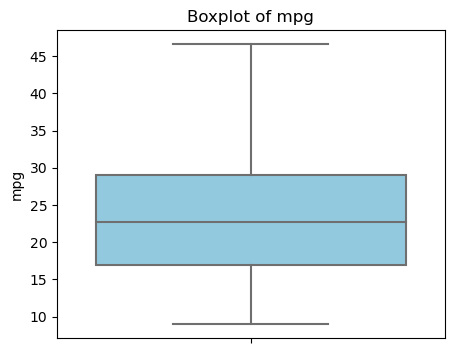

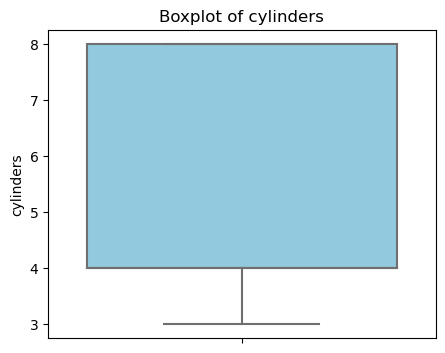

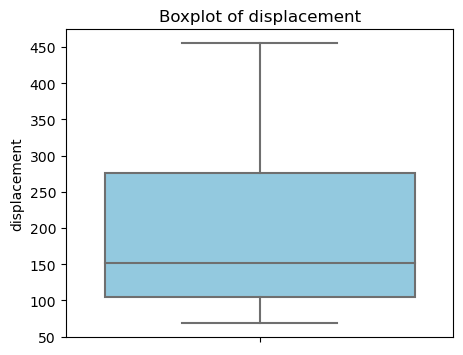

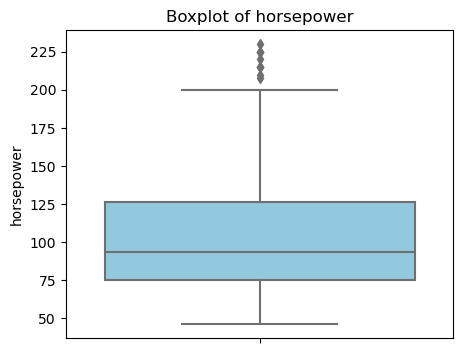

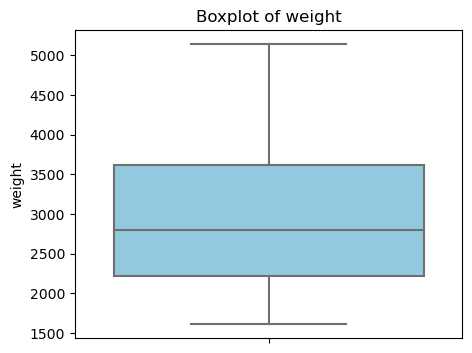

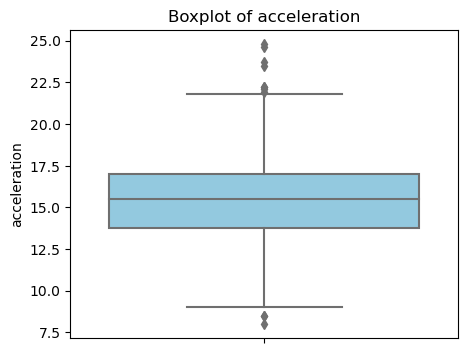

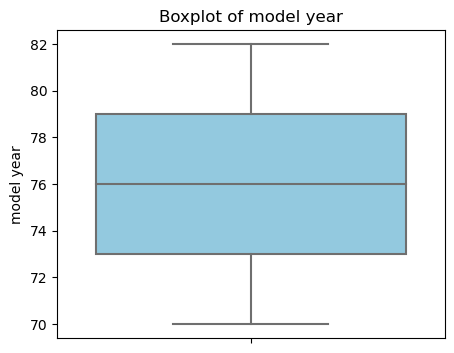

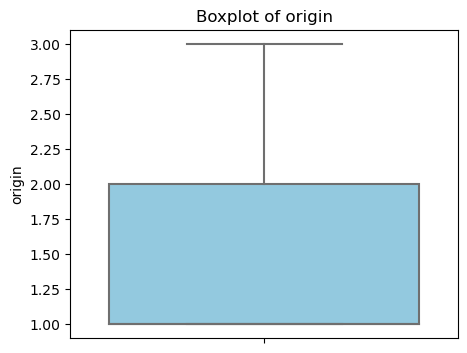

In [16]:
# Checking for outliers - boxplots

for col in car.columns:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=car[col],color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

Outliers found in horsepower and acceleration.

In [21]:
# handling outliers using IQR
cols=["horsepower","acceleration"]

for col in cols:
    Q1=car[col].quantile(0.25)
    Q3=car[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    car=car[(car[col]>=lower_bound)&(car[col]<=upper_bound)]

print("New shape after outlier removal: ",car.shape)

New shape after outlier removal:  (354, 8)


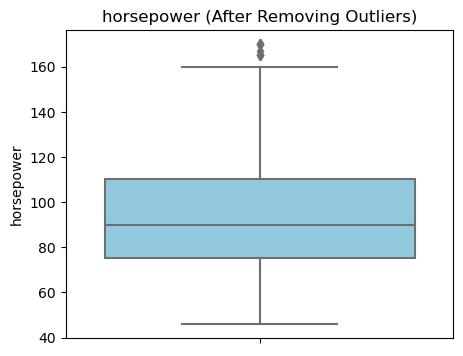

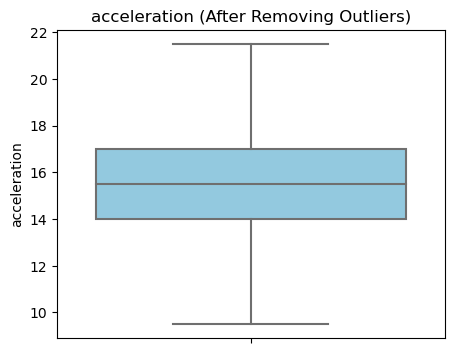

In [22]:
# Rechecking the outliers - boxplots
for col in cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=car[col],color="skyblue")
    plt.title(f"{col} (After Removing Outliers)")
    plt.show()

Outliers in acceleration were removed, while extreme outliers in horsepower were removed but higher valid values were retained to preserve natural variability.

**EXPLORATORY DATA ANALYSIS (EDA)**

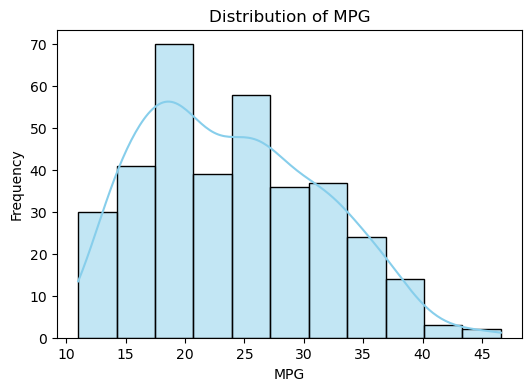

In [23]:
# Checking target distribution - Histplot
plt.figure(figsize=(6,4))
sns.histplot(car["mpg"],kde=True,color="skyblue")
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.show()

In [26]:
# skewness canculation
from scipy.stats import skew
mpg_skewness=skew(car["mpg"])
print(f"skewness of mpg: {mpg_skewness: .2f}")

skewness of mpg:  0.40


mpg distribution is roughly symmetric, with only a slight right skew.

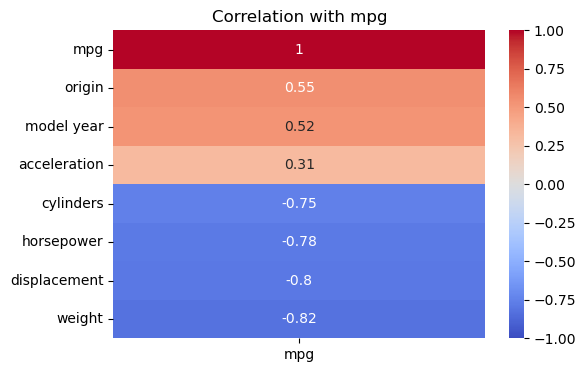

In [28]:
# checking for correlation with target (features most related to mpg for model building) - Heatmap
plt.figure(figsize=(6,4))
corr_matrix=car.corr()
sns.heatmap(corr_matrix[["mpg"]].sort_values(by="mpg",ascending=False),annot=True,cmap="coolwarm",vmin=-1,vmax=1)
plt.title("Correlation with mpg")
plt.show()

weight, displacement, horsepower, and cylinders show strong negative correlations with mpg.

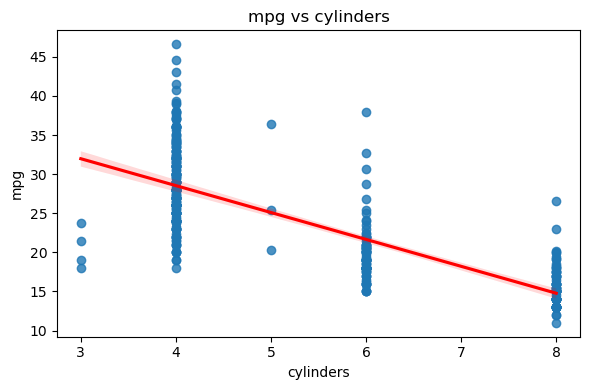

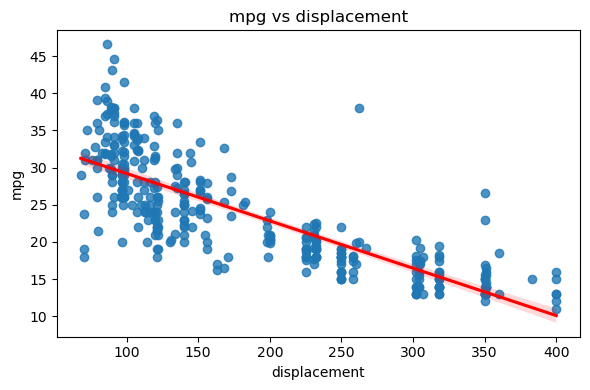

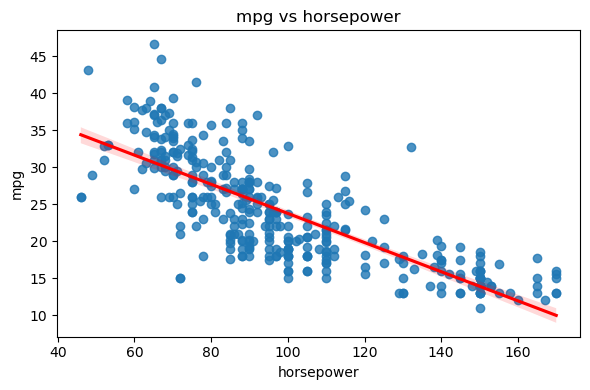

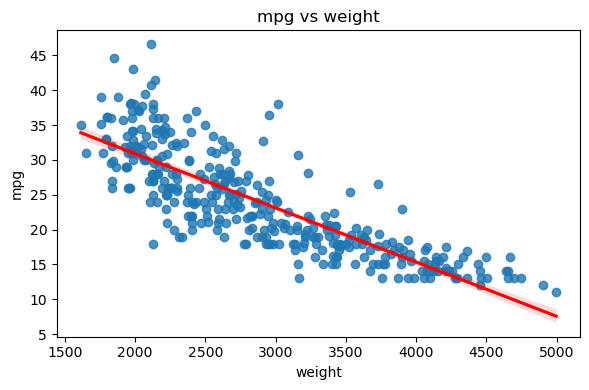

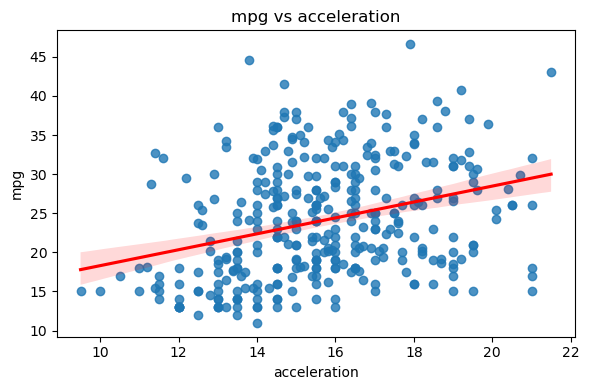

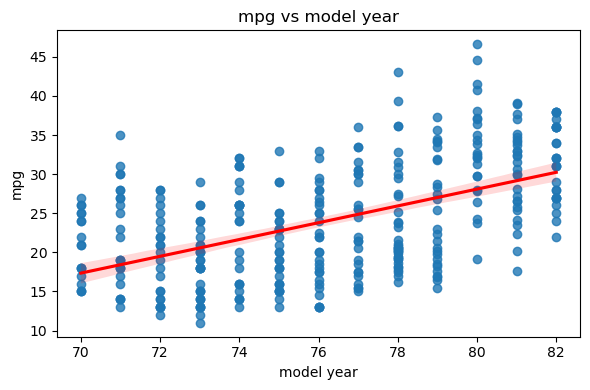

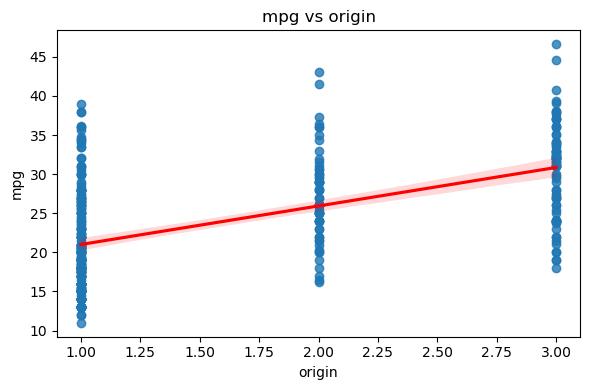

In [46]:
# Checking for linearity between target and predictors - Scatterplots
num_cols=car.columns.drop("mpg")

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.regplot(x=car[col],y=car["mpg"],line_kws={"color":"red"})
    plt.title(f"mpg vs {col}")
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.tight_layout()
    plt.show()

The scatterplots show strong linear relationship between the target, mpg and the following features: weight, displacement, horsepower, and model year.

In [69]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif=car[["weight","displacement","horsepower","cylinders","model year"]]
vif_data=pd.DataFrame()
vif_data["Feature"]=X_vif.columns
vif_data["VIF"]=[variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
print(vif_data)

        Feature         VIF
0        weight  138.734874
1  displacement   94.046506
2    horsepower   58.855261
3     cylinders  135.795077
4    model year   52.125803


The VIF values indicate severe multicollinearity among predictors, but weight and model year kept for strong mpg relation and interpretability.

**MODEL BUILDING AND EVALUATIONS**

In [93]:
# Defining features (reduced predictors) and target
features=["weight","model year"]
X=car[features]
y=car["mpg"]

In [94]:
# Splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
# Initializing and fitting the linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
# Intercept, coefficients, and regression equation of the model
intercept=model.intercept_
print(f"Intercept: {intercept:.2f}")

coefs=model.coef_
coef_dict={feature:coef for feature,coef in zip(X.columns,coefs)}
print("Coefficients:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.2f}")

equation=f"mpg={intercept:.2f}"
for feature, coef in zip(X.columns,coefs):
    equation += f" + ({coef:.2f} * {feature})"
print("\nRegression Equation:")
print(equation)

Intercept: -11.91
Coefficients:
weight: -0.01
model year: 0.74

Regression Equation:
mpg=-11.91 + (-0.01 * weight) + (0.74 * model year)


mpg decreases slightly with heavier cars (weight: -0.01), but increases significantly for newer model years (model year: 0.74).

In [97]:
# Making predictions
y_pred=model.predict(X_test)

print("Predictions for test set:",y_pred)

Predictions for test set: [24.92875787 25.30141416 32.37796667 15.83770822 12.73259849 28.52411097
 23.14801541 20.72521946 24.99282127 33.74887106 22.46913501 31.62732658
 29.10281079 33.4302131  27.96483156 34.76192179 31.35212721 25.64955761
 33.18994652 29.44787572 19.45248173 18.74991801 26.46580036 18.54813739
 28.78379796 31.83301524 28.40960241 27.59643817 17.50714043 20.14959815
 25.90261291 20.36037925 34.86672015 29.89738414 28.26252985 29.20962306
 16.45217035 20.31336748 21.91719702 13.43551708 22.16054212 19.78475794
 31.19451492 25.69727912 30.53505493 21.86012018 11.21651567 14.84798594
 25.66471511 21.68000896 32.3081011  17.13874704 25.49194532 28.33085616
 31.86250072 24.19516941 15.75623832 17.93367526 20.84825383 31.74065074
 23.70847921 11.3562468  31.29505037 21.66568098 12.35260077 25.17991905
 34.65712344 19.54484623 26.11647252 23.91535227 29.8500175 ]


In [98]:
# Actual mpg vs predicted mpg
model_diff=pd.DataFrame({"Actual MPG":y_test,"Predicted MPG":y_pred,"Residual":y_test-y_pred})
model_diff.head(10)

,Actual MPG,Predicted MPG,Residual
254,20.2,24.928758,-4.728758
57,24.0,25.301414,-1.301414
322,46.6,32.377967,14.222033
213,13.0,15.837708,-2.837708
75,14.0,12.732598,1.267402
308,33.5,28.524111,4.975889
22,25.0,23.148015,1.851985
76,18.0,20.725219,-2.725219
168,23.0,24.992821,-1.992821
378,38.0,33.748871,4.251129


In [99]:
# Error metrics
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)


print(f"R-Squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R-Squared Score: 0.8094
Mean Squared Error: 10.47
Root Mean Squared Error: 3.24
Mean Absolute Error: 2.51


- The model explains 81% 0f the variability in mpg (r2=0.81).
- Predictions are within ~2.5-3.2 mpg of actual values (rmse=3.24, mae=2.51)


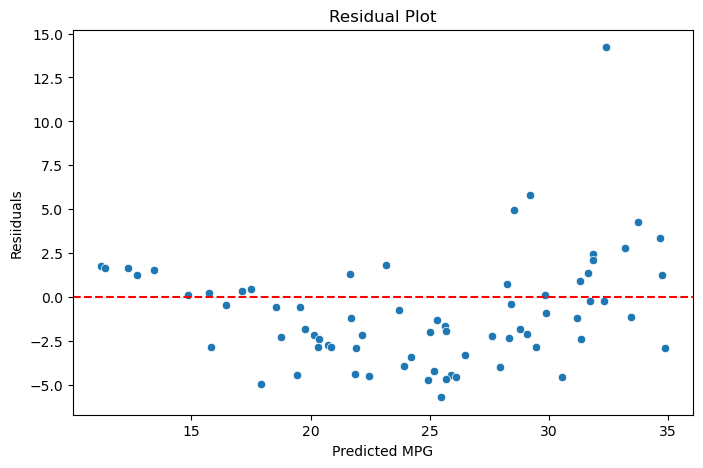

In [100]:
# Residual plot
residuals=y_test-y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(y=0,color="r",linestyle="--")
plt.xlabel("Predicted MPG")
plt.ylabel("Resiiduals")
plt.title("Residual Plot")
plt.show()

Residuals are randomly distributed. Hence, model assumptions hold.